In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

solve for logistic regression by maximizing its loglikelihood

### Iris data

In [104]:
d = pd.read_csv('Iris.csv')
df = d[d.columns[1:]]
x = df.iloc[:, :-1]
x.columns = ['sepallen', 'sepalwid', 'petallen', 'petalwid']
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y = d[d.columns[-1]].replace(mapping)

In [105]:
# only consider label 0 and 1 data in the iris dataset as logistic is binary classifier here 
x2 = x[y != 2]
y2 = y[y != 2]

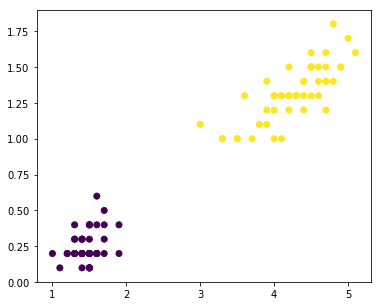

In [106]:
# the two classes are linear seperable 

plt.figure(figsize = (6, 5))
plt.scatter(x2[['petallen','petalwid']].iloc[:, 0], x2[['petallen','petalwid']].iloc[:, 1], c = y2)

In [90]:
# define sigmoid function
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

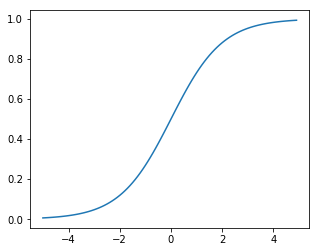

In [91]:
plt.figure(figsize = (5, 4))

px = np.arange(-5, 5, 0.1)
plt.plot(px, sigmoid(px))

### loglikelihood and gradient descent

In [118]:
# # define log likelihood

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum(target*np.log(sigmoid(scores)) + (1 - target)*np.log(1 - sigmoid(scores)))
    return ll

# def log_likelihood(features, target, weights):
#     scores = np.dot(features, weights)
#     ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
#     return ll

In [93]:
# weight update using Gradient of the log likelihood 
# gradient updates of the weights under logistic regression gives global maxima 

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
    
    # initialize the weight vector    
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        
        # update weights using gradient of log likelihood, which is X.T * (Y - Predictions)
        # update for both intercept and the weights 
        weights += learning_rate * np.dot(features.T, (target - predictions))
        
        # print log_likelihood regularly 
        if step % 1000 == 0:
            print(log_likelihood(features, target, weights))
            
    return weights

In [107]:
# train logistic regression with iris data  

weights = logistic_regression(x2, y2, num_steps = 5000, learning_rate = 5e-5, add_intercept = True)


-68.9970126954
-12.6498534467
-6.74494742997
-4.6194216671
-3.52721756894


### comapre with scikit learn logistic regression 

In [108]:
from sklearn.linear_model import LogisticRegression
# iris data 
clf = LogisticRegression(fit_intercept = True, C = 1e15)
clf.fit(x2, y2)

print ('weights from scratch: {0}'.format(weights))
print ('weights from scikit-learn: {0}{1}'.format(clf.intercept_, clf.coef_))

weights from scratch: [-0.24971577 -0.38888287 -1.416994    2.16971841  0.94196845]
weights from scikit-learn: [-0.86928546][[-1.42835675 -4.85355988  7.66295861  3.67536192]]


### accuracy

In [109]:
# round the prediction theta*x to 0 or 1 as prediction results

final_scores = np.dot(np.hstack((np.ones((x2.shape[0], 1)), x2)), weights)
predicts = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((predicts == y2).sum().astype(float) / len(predicts)))
print ('Accuracy from sk-learn: {0}'.format(clf.score(x2, y2)))



Accuracy from scratch: 1.0
Accuracy from sk-learn: 1.0


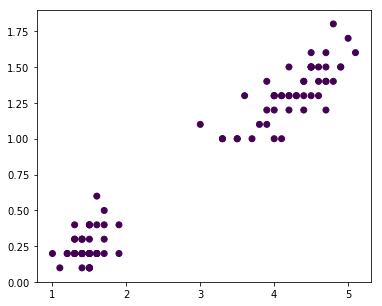

In [111]:
plt.figure(figsize = (6, 5))
plt.scatter(x2[['petallen','petalwid']].iloc[:, 0], x2[['petallen','petalwid']].iloc[:, 1], c = predicts == y2 - 1)


In [113]:
# for the generated data

np.random.seed(12)
num_observations = 5000

xx1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
xx2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((xx1, xx2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))

dweights = logistic_regression(simulated_separableish_features, simulated_labels, num_steps = 5000, learning_rate = 5e-5, add_intercept=True)

print(weights)

-4346.26477915
-240.69185706
-194.518077
-176.731346447
-167.145694373
[-0.24971577 -0.38888287 -1.416994    2.16971841  0.94196845]


In [114]:
# comapre with scikit learn logistic regression 

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept = True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)

LogisticRegression(C=1000000000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [115]:
print ('weights from scratch: {0}'.format(dweights))
print ('weights from scikit-learn: {0}{1}'.format(clf.intercept_, clf.coef_))

weights from scratch: [-9.44447429 -3.40122707  5.6140984 ]
weights from scikit-learn: [-13.99400797][[-5.02712572  8.23286799]]


In [117]:
# round the prediction theta*x to 0 or 1 as prediction results

final_scores = np.dot(np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),simulated_separableish_features)), dweights)
preds = np.round(sigmoid(final_scores))

print ('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))
print ('Accuracy from sk-learn: {0}'.format(clf.score(simulated_separableish_features, simulated_labels)))

Accuracy from scratch: 0.995
Accuracy from sk-learn: 0.9948


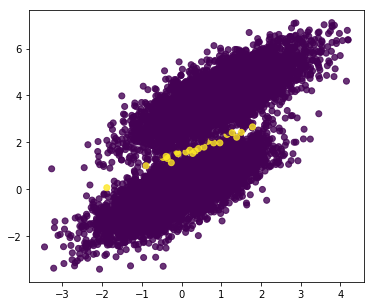

In [125]:
# points lie in between two groups are difficult to classifiy 
plt.figure(figsize = (6, 5))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1], c = (preds == simulated_labels - 1) , alpha = .8)